In [1]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import udf, col
from pyspark.sql.types import IntegerType

# Spark 세션 생성
spark = SparkSession.builder.appName("CommentAnalysis").getOrCreate()

# CSV 파일을 읽어서 DataFrame 생성 (UTF-8로 인코딩된 파일이라 가정)
df = spark.read.csv("assembled_data_date.csv", header=True, inferSchema=True, encoding="utf-8")

In [2]:
df.show()

+----------------------------------+--------+---------+---------+
|                           comment|    date|num_likes|      tag|
+----------------------------------+--------+---------+---------+
|          우산 비닐은 선넘지않았나|20231109|        9|instagram|
|         아니 빨대는 어쩌라는 거야|20231109|        3|instagram|
|           취소 된걸로 알고 있는뎁|20231109|        7|instagram|
|        테이크아웃 어째한다는 건데|20231109|        3|instagram|
|편의점에서 컵라면 먹으려면 쇠젓...|20231109|       27|instagram|
|    비닐우산 나 몇개월동안 쓰는데?|20231109|        5|instagram|
|      마라탕 포장은 나무젓가락인데|20231109|        0|instagram|
| 정말 궁금해서 그런데 그러면 아...|20231109|        1|instagram|
|  그럼 쓰래기는 어떻게 버려요? ...|20231109|        0|instagram|
|  세상이 어떻게 될라고 이러는지 ㅋ|20231109|        0|instagram|
| 이거 무로 돌아가기로 했어요 없...|20231116|        0|instagram|
|                     아 너무하네..|20231109|        0|instagram|
| 정책 철회된거 확인하고 와라 거...|20231116|        0|instagram|
|    그럼 커피 테이크아웃은?????...|20231109|        0|instagram|
|                  ???? 무ㅏ 쓰라고|20231109|  

findfont: Font family 'MALGUNGOTHIC' not found.
findfont: Font family 'MALGUNGOTHIC' not found.
findfont: Font family 'MALGUNGOTHIC' not found.
findfont: Font family 'MALGUNGOTHIC' not found.
findfont: Font family 'MALGUNGOTHIC' not found.
findfont: Font family 'MALGUNGOTHIC' not found.
findfont: Font family 'MALGUNGOTHIC' not found.
findfont: Font family 'MALGUNGOTHIC' not found.
findfont: Font family 'MALGUNGOTHIC' not found.
findfont: Font family 'MALGUNGOTHIC' not found.
findfont: Font family 'MALGUNGOTHIC' not found.
findfont: Font family 'MALGUNGOTHIC' not found.
/opt/conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 47691 (\N{HANGUL SYLLABLE MEOS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.11/site-packages

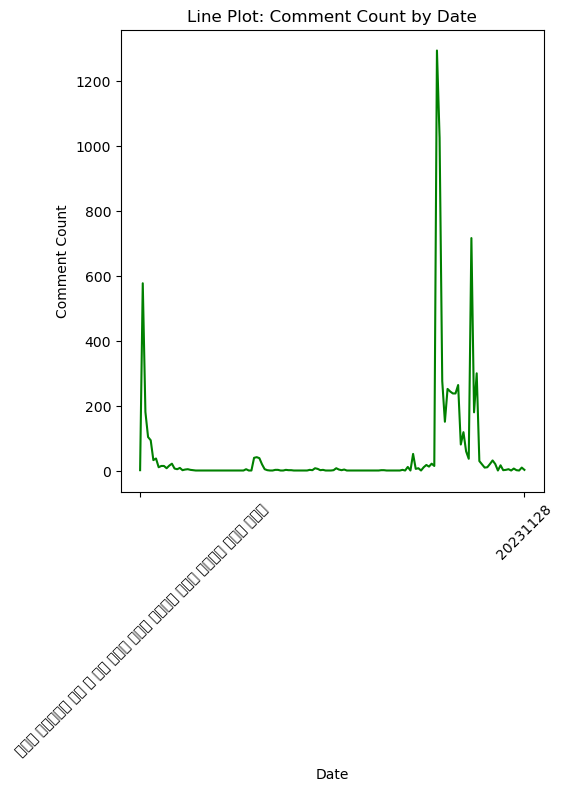

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc # 폰트 세팅을 위한 모듈 추가

# "date"를 기준으로 그룹화하고 count
grouped_df2 = df.groupBy("date").count()

# null 값을 제거하여 PySpark DataFrame을 생성
grouped_df2 = grouped_df2.na.drop(subset=["date", "count"])

# 날짜를 오름차순으로 정렬
grouped_df2 = grouped_df2.orderBy("date")

# pandas DataFrame으로 변환
pandas_df2 = grouped_df2.toPandas()

# 그래프 그리기
plt.figure(figsize=(12, 6))

# 선 그래프
plt.subplot(1, 2, 1)
plt.plot(pandas_df["date"], pandas_df["count"], 'g-')
plt.xlabel("Date")
plt.ylabel("Comment Count")
plt.title("Line Plot: Comment Count by Date")
plt.xticks(rotation=45)

# x축 눈금을 처음과 끝만 포함
plt.xticks([pandas_df["date"].iloc[0], pandas_df["date"].iloc[-1]])

#plt.tight_layout()
#plt.savefig("graph_1.png")
plt.show()

In [8]:
from matplotlib import font_manager, rc

# D2Coding 폰트를 사용
rc('font', family='MALGUNGOTH')

In [18]:
# 가장 높은 빈도수를 가진 행 찾기
most_frequent_row = grouped_df.orderBy(col("count").desc()).first()

# 결과 출력
most_frequent_date = most_frequent_row["date"]
most_frequent_count = most_frequent_row["count"]
print(f"가장 높은 빈도수를 가진 날짜: {most_frequent_date}, 빈도수: {most_frequent_count}")

가장 높은 빈도수를 가진 날짜: 20231025, 빈도수: 1293


In [22]:
# 두 번째로 높은 빈도수를 가진 행 찾기
second_most_frequent_row = grouped_df.orderBy(col("count").desc()).limit(3).orderBy("count").first()

# 결과 출력
second_most_frequent_date = second_most_frequent_row["date"]
second_most_frequent_count = second_most_frequent_row["count"]
print(f"세 번째로 높은 빈도수를 가진 날짜: {second_most_frequent_date}, 빈도수: {second_most_frequent_count}")

세 번째로 높은 빈도수를 가진 날짜: 20231107, 빈도수: 716
